## Import

In [35]:
import pandas as pd


## Read CSV

In [36]:
data = pd.read_csv('influencers.csv', index_col = 'id')

In [37]:
data

,followerCount,engagementRate
id,,
1,6207,1.0
2,38237,5.8
3,14840,0.6
4,43851,1.4
5,15530,3.5
...,...,...
96,13436,0.7
97,5741,0.9
98,27417,0.4


In [38]:
data.head()

,followerCount,engagementRate
id,,
1,6207,1.0
2,38237,5.8
3,14840,0.6
4,43851,1.4
5,15530,3.5


In [39]:
data.loc[[1]] #accessing row

,followerCount,engagementRate
id,,
1,6207,1.0


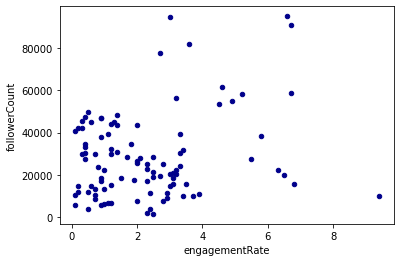

In [40]:
data.plot.scatter(y='followerCount', x='engagementRate', c='DarkBlue')

In [41]:
#low follower low engagement = refused
#mid follower low engagement = refused
#high follower low engagement = considered
#low follower mid engagement = refuse
#mid follower mid engagement = considered
#high follower mid engagement = accept
#low follower high engagement = considered
#mid follower high engagement = accept
#high follower high engagement = accept